<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/EDA_with_Hollywood_Movies_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS WITH  HOLLYWOOD MOVIES DATASET

## INTRODUCTION 

In this Notebook we will be doing an Exploratory Data Analysis with Hollywood movies dataset and we will try build a linear regression model from the data, check for its fit and validity. well if the model is validated we will predict 
with unseen datas. 

### Importing Necessary Libraries and loading the data

In [137]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression 

from scipy import stats

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [138]:
import warnings 
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('/content/gdrive/MyDrive/INTERNSHIP/GIRP 23/HollywoodsMostProfitableStories.csv')
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [141]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


### Checking for null values

In [142]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

In [143]:
df = df.dropna()

df.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience  score %    0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

## EDA

Text(0.5, 1.0, 'Distribition of Audience Score')

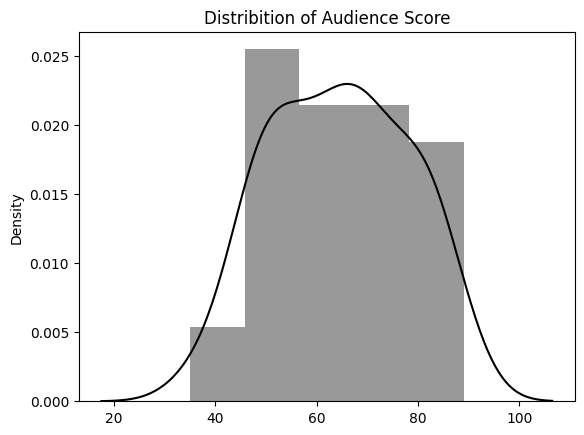

In [144]:
sns.distplot(x = df['Audience  score %'] , hist = True , color = 'black')
plt.title('Distribition of Audience Score')

Text(0.5, 1.0, 'Distribition of Profitability')

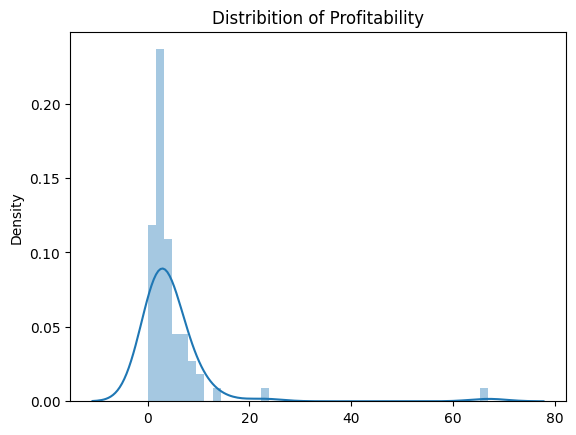

In [145]:
sns.distplot( x = df['Profitability'] , hist = True)
plt.title('Distribition of Profitability')

Text(0.5, 1.0, 'Worldwide Gross over Years ')

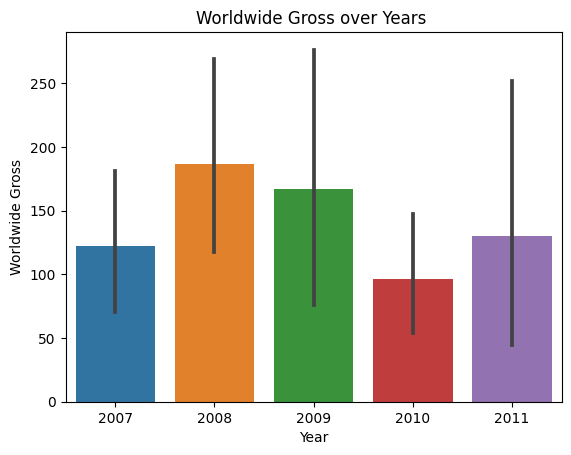

In [146]:
sns.barplot( x = df['Year'] , y = df['Worldwide Gross'] )
plt.title('Worldwide Gross over Years ')

Text(0.5, 1.0, 'Profitability over Genre')

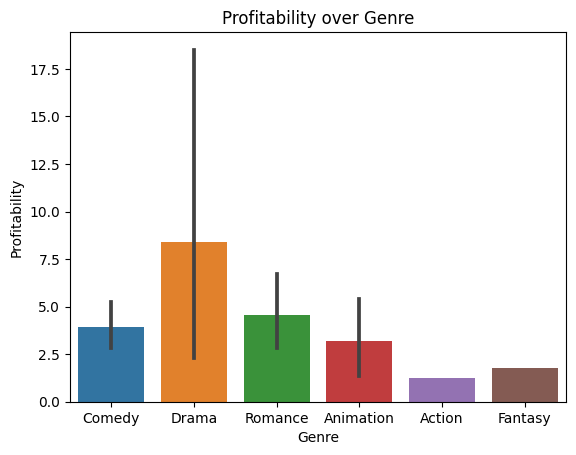

In [147]:
sns.barplot( x = df['Genre'] , y = df['Profitability'])
plt.title('Profitability over Genre')

In [148]:
mdf = df[['Film', 'Profitability' , 'Worldwide Gross']]

mdf = mdf.groupby('Film').agg({'Profitability' : np.sum , 'Worldwide Gross' : np.sum })
mdf = mdf.sort_values( by = 'Profitability' , ascending = False )

mdf

,Profitability,Worldwide Gross
Film,,
Fireproof,66.934000,33.467000
High School Musical 3: Senior Year,22.913136,252.044501
The Twilight Saga: New Moon,14.196400,709.820000
Waitress,11.089742,22.179483
Twilight,10.180027,376.661000
...,...,...
My Week with Marilyn,0.825800,8.258000
Across the Universe,0.652603,29.367143
A Dangerous Method,0.448645,8.972895


In [149]:
# no of films over gener 

gdf = df[[ 'Genre' ,'Film' ]]

gdf = gdf.groupby('Genre').count()
gdf = gdf.sort_values( by = 'Film' , ascending = False)

gdf


,Film
Genre,
Comedy,38
Drama,13
Romance,13
Animation,3
Action,1
Fantasy,1


In [150]:
sdf = df[['Lead Studio', 'Profitability' , 'Worldwide Gross']]

sdf = sdf.groupby('Lead Studio').agg({'Profitability' : np.sum , 
                                      'Worldwide Gross' : np.sum })
sdf = sdf.sort_values( by = 'Profitability' , ascending = False )

sdf

,Profitability,Worldwide Gross
Lead Studio,,
Independent,116.757308,1465.392606
Disney,44.436057,1977.562585
Warner Bros.,38.523662,2081.191904
Summit,31.889810,1242.262996
Fox,27.069134,722.568300
Universal,26.615773,1152.425216
Sony,19.345304,403.120027
Paramount,10.376000,321.212628
20th Century Fox,5.064621,156.758000


In [151]:
lsdf = df[[ 'Lead Studio' ,'Film' ]]

lsdf = lsdf.groupby('Lead Studio').count()
lsdf = lsdf.sort_values( by = 'Film' , ascending = False)

lsdf

,Film
Lead Studio,
Independent,17
Warner Bros.,12
Disney,6
Fox,6
Universal,6
Summit,5
Paramount,4
Sony,4
The Weinstein Company,3


Text(0.5, 1.0, 'Rotten Tomatoes over Years')

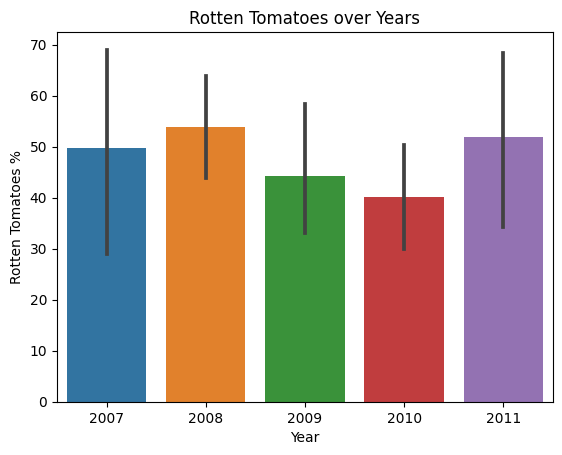

In [152]:
sns.barplot( x = df['Year'] , y = df['Rotten Tomatoes %'])
plt.title('Rotten Tomatoes over Years')

Text(0.5, 1.0, 'Audience Score over Years')

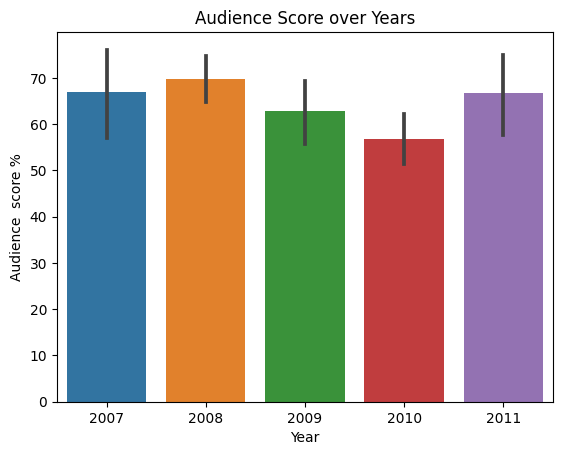

In [153]:
sns.barplot( x = df['Year'] , y = df['Audience  score %'])
plt.title('Audience Score over Years')

In [154]:
rsdf = df[[ 'Lead Studio' , 'Audience  score %' , 'Rotten Tomatoes %']]

rsdf = rsdf.groupby('Lead Studio').agg({ 'Audience  score %' : np.sum , 
                                 'Rotten Tomatoes %' : np.sum })
rsdf = rsdf.sort_values( by = 'Audience  score %' , ascending = False)

rsdf

,Audience score %,Rotten Tomatoes %
Lead Studio,,
Independent,1094.0,835.0
Warner Bros.,700.0,437.0
Disney,459.0,442.0
Fox,414.0,311.0
Universal,375.0,328.0
Summit,366.0,196.0
Sony,278.0,208.0
Paramount,234.0,185.0
The Weinstein Company,206.0,215.0


## Model Development

In [155]:
# Taking the Needed data for model development

mdf = df[['Audience  score %' , 'Profitability', 'Rotten Tomatoes %' , 'Worldwide Gross']]

mdf

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
0,71.0,5.343622,40.0,160.308654
1,81.0,8.096000,87.0,60.720000
2,89.0,0.448645,79.0,8.972895
3,64.0,4.382857,89.0,30.680000
4,84.0,0.652603,54.0,29.367143
...,...,...,...,...
68,72.0,3.081421,60.0,117.094000
69,72.0,6.267647,28.0,219.367646
71,35.0,1.211818,43.0,26.660000
72,52.0,1.090000,68.0,19.620000


#### Corelation Analysis

In [156]:
cor_df = mdf.corr()

cor_df 

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Audience score %,1.000000,0.042005,0.576542,0.396049
Profitability,0.042005,1.000000,0.023352,0.143764
Rotten Tomatoes %,0.576542,0.023352,1.000000,0.008590
Worldwide Gross,0.396049,0.143764,0.008590,1.000000


Text(0.5, 1.0, 'Correlation of Variables')

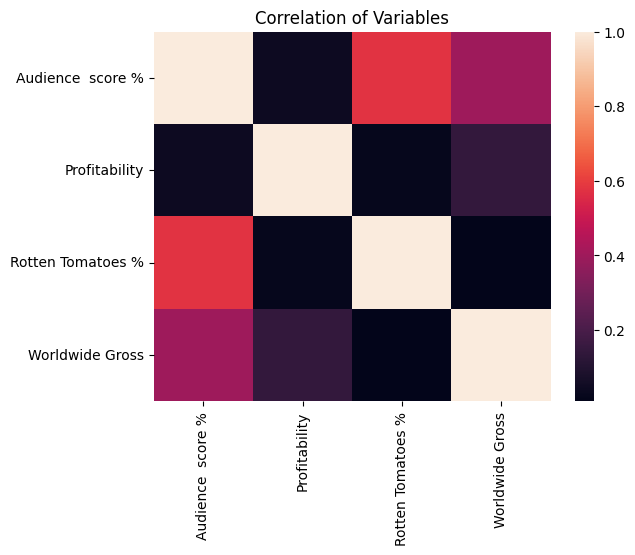

In [157]:
sns.heatmap(cor_df)
plt.title('Correlation of Variables')

Every variable in the model is positively less correlated 

### Checking for outlier with box plot

Text(0.5, 1.0, 'Outliers of Profitability')

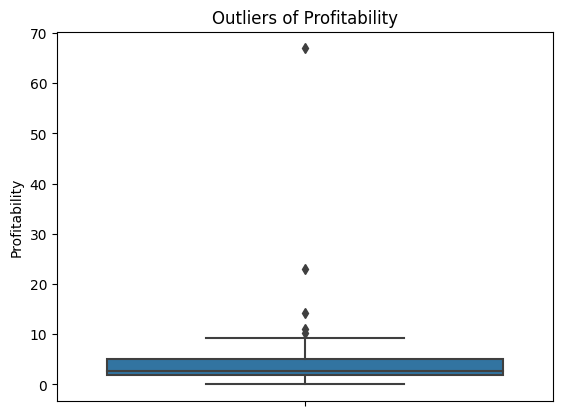

In [158]:
sns.boxplot(y = mdf['Profitability'])
plt.title('Outliers of Profitability')

Text(0.5, 1.0, 'Outliers of Audience Score')

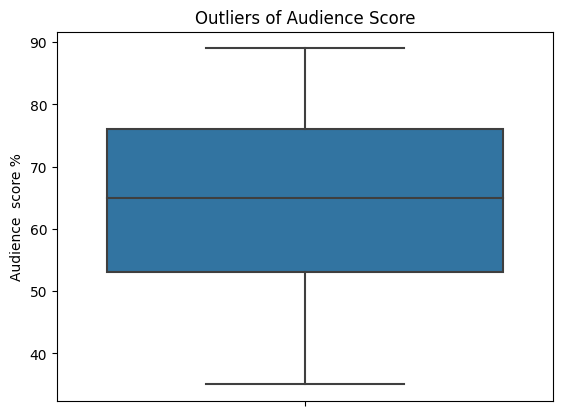

In [159]:
sns.boxplot(y = mdf['Audience  score %'])
plt.title('Outliers of Audience Score')

Text(0.5, 1.0, 'Outliers of Rotten Tomatoes')

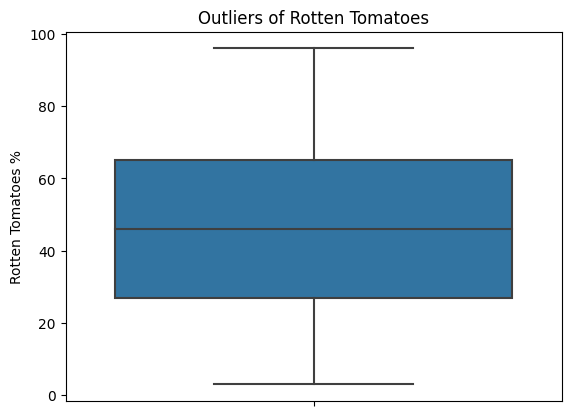

In [160]:
sns.boxplot(y = mdf['Rotten Tomatoes %'])
plt.title('Outliers of Rotten Tomatoes')

Text(0.5, 1.0, 'Outliers of Worldwide Gross')

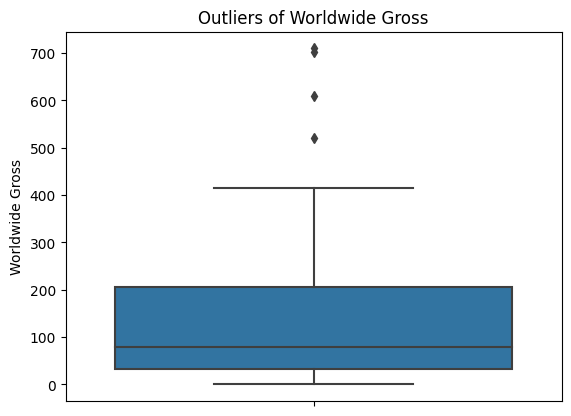

In [161]:
sns.boxplot(y = mdf['Worldwide Gross'])
plt.title('Outliers of Worldwide Gross')

Since the variable profitability and world wide gross has Outliers we will be replacing it with z score.

In [162]:
zs = stats.zscore(mdf)
th = 3 
ol = mdf[abs(zs) > th]
dwo = mdf[abs(zs)<= th]

dwo

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
0,71.0,5.343622,40.0,160.308654
1,81.0,8.096000,87.0,60.720000
2,89.0,0.448645,79.0,8.972895
3,64.0,4.382857,89.0,30.680000
4,84.0,0.652603,54.0,29.367143
...,...,...,...,...
68,72.0,3.081421,60.0,117.094000
69,72.0,6.267647,28.0,219.367646
71,35.0,1.211818,43.0,26.660000
72,52.0,1.090000,68.0,19.620000


In [163]:
dwo.isnull().sum()

Audience  score %    0
Profitability        1
Rotten Tomatoes %    0
Worldwide Gross      2
dtype: int64

In [164]:
dwo = dwo.dropna()

dwo

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
0,71.0,5.343622,40.0,160.308654
1,81.0,8.096000,87.0,60.720000
2,89.0,0.448645,79.0,8.972895
3,64.0,4.382857,89.0,30.680000
4,84.0,0.652603,54.0,29.367143
...,...,...,...,...
68,72.0,3.081421,60.0,117.094000
69,72.0,6.267647,28.0,219.367646
71,35.0,1.211818,43.0,26.660000
72,52.0,1.090000,68.0,19.620000


Checking for relationship between independent and dependent variables induvidually using scatter plot.

Text(0.5, 1.0, 'Relationship Between Audience Score and Profitability')

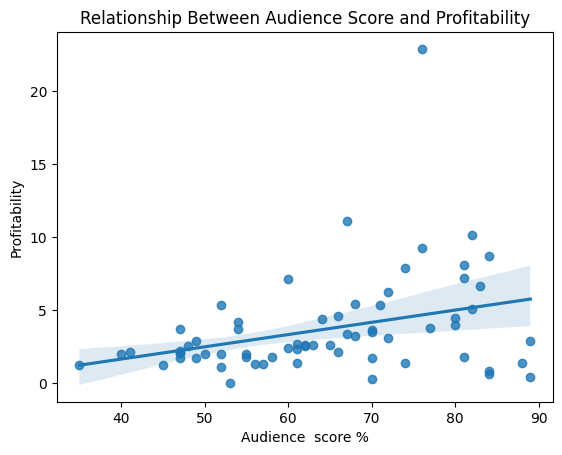

In [165]:
sns.regplot( x = dwo['Audience  score %'] , y = dwo['Profitability'])
plt.title('Relationship Between Audience Score and Profitability')

Text(0.5, 1.0, 'Relationship Between Rotten Tomatoes and Profitability')

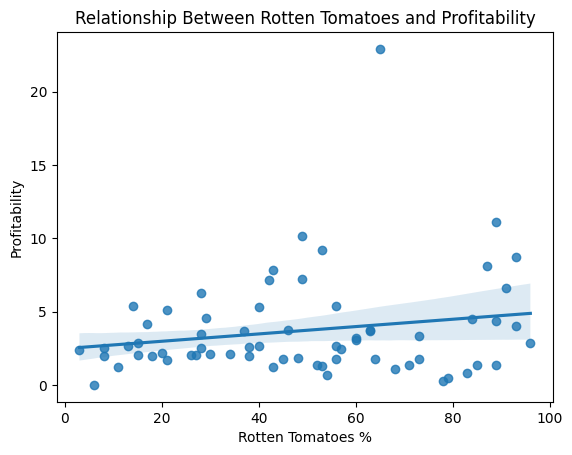

In [166]:
sns.regplot( x = dwo['Rotten Tomatoes %'] , y = dwo['Profitability'])
plt.title('Relationship Between Rotten Tomatoes and Profitability')

Text(0.5, 1.0, 'Relationship Between Worldwide Gross and Profitability')

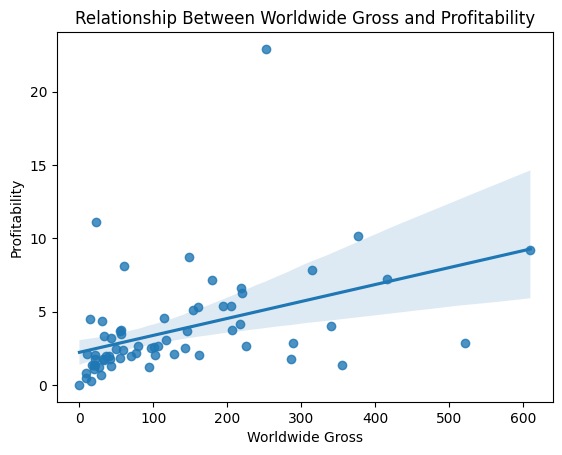

In [167]:
sns.regplot( x = dwo['Worldwide Gross'] ,  y = dwo['Profitability'])
plt.title('Relationship Between Worldwide Gross and Profitability')

Every Independent variable has a positive realtionship between the Dependent variable.

### Building Linear model

In [168]:
x = dwo[['Audience  score %' , 'Worldwide Gross' , 'Rotten Tomatoes %']]

y = dwo['Profitability']

In [169]:
# checking for significance
t_stat , p_val = stats.ttest_ind(x,y)

print('T Stat :' , t_stat)
print('P Value :' , p_val)

T Stat : [34.88080161  7.72978168 13.77702874]
P Value : [7.41584540e-68 2.58666167e-12 3.49814919e-27]


In [170]:
lm = LinearRegression()
lm.fit(x,y)

print('Intercept :' , lm.intercept_)
print('Coefficient :' , lm.coef_)
print('R square :' , lm.score(x,y))


Intercept : -0.2999315937552116
Coefficient : [0.03706187 0.00975633 0.00760916]
R square : 0.22081839406728965


## Findings and Conclusion 

In this model development we found that there is Less positive correlation between the variables and the relationships are positively associated with the dependent variable.

The independent are also significant we tested with T Stastic and P value, however the goodness of fit for the model was only 22%. The intercept related is negative and the coefficients were positive related. 

This Model is not a invalid because of the following reasons :
 1. The sample size is less.
 2. While checking the relationship with Regplot we found the problem of Heteroskedasticity in the data.  

 